In [1]:
%load_ext autoreload
%autoreload 2
%config InlineBackend.figure_format = "retina"

In [2]:
import glob
import pickle
import matplotlib.pyplot as plt
import numpy as np
import colorcet as cc
from importlib import reload


Text(0, 0.5, '$N$')

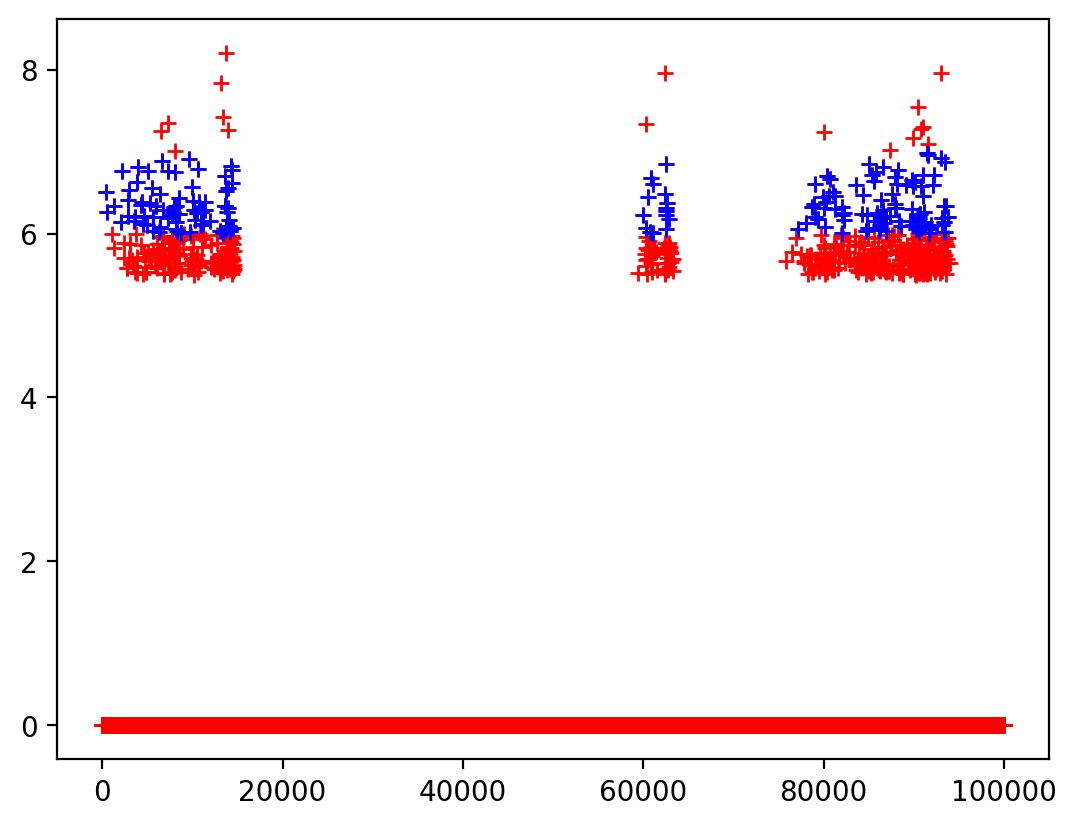

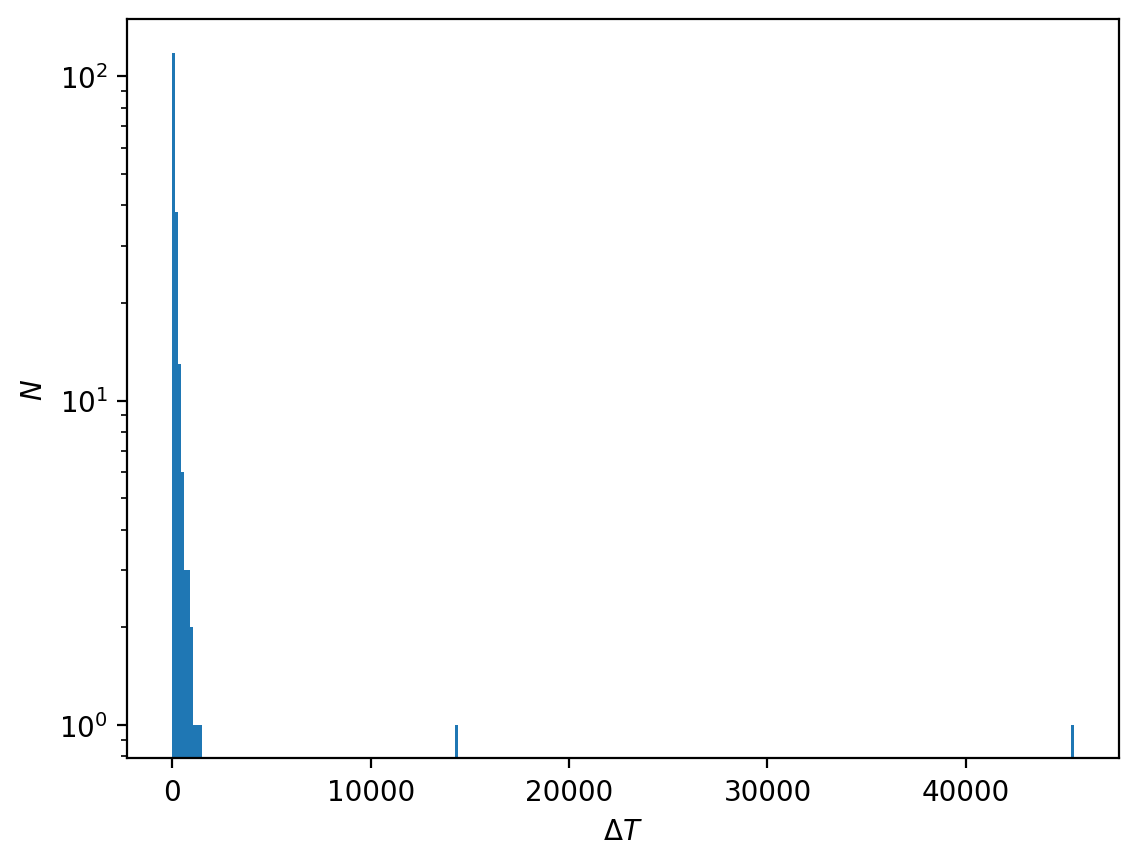

In [38]:
def get_most_recent_output_folder_name():
    most_recent_output_folder_name = sorted(glob.glob("./runs/*"))[-1]
    return most_recent_output_folder_name


most_recent_output_folder_name = get_most_recent_output_folder_name()
time_series = pickle.load(
    open(most_recent_output_folder_name + "/time_series.pickle", "rb")
)

plt.plot(time_series.time, time_series.event_magnitude, "r+")
lower_indices = np.where(time_series.event_magnitude >= 6.0)
upper_indices = np.where(time_series.event_magnitude < 7.0)
a = np.intersect1d(lower_indices, upper_indices)
plt.plot(time_series.time[a], time_series.event_magnitude[a], "b+")


# Calculate interevent times
plt.figure()
plt.hist(np.diff(time_series.time[a]), 300, log=True)
plt.xlabel("$\Delta T$")
plt.ylabel("$N$")




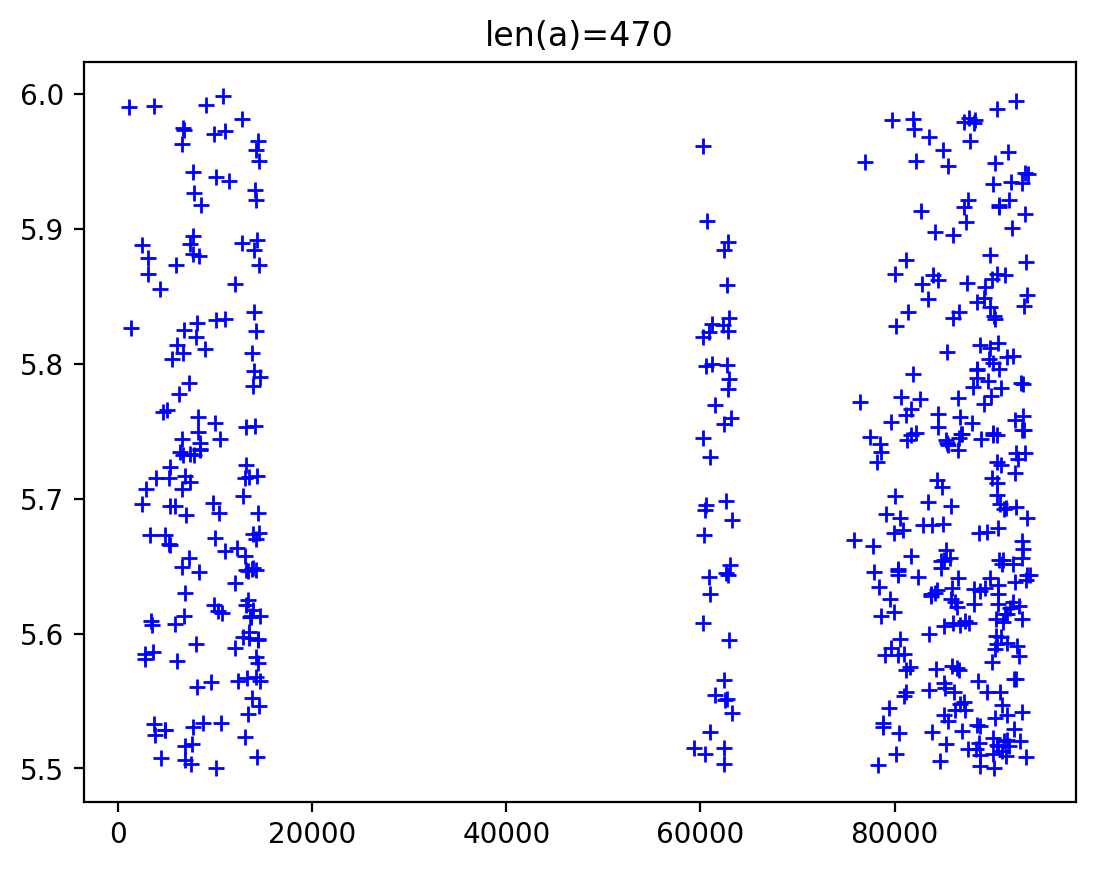

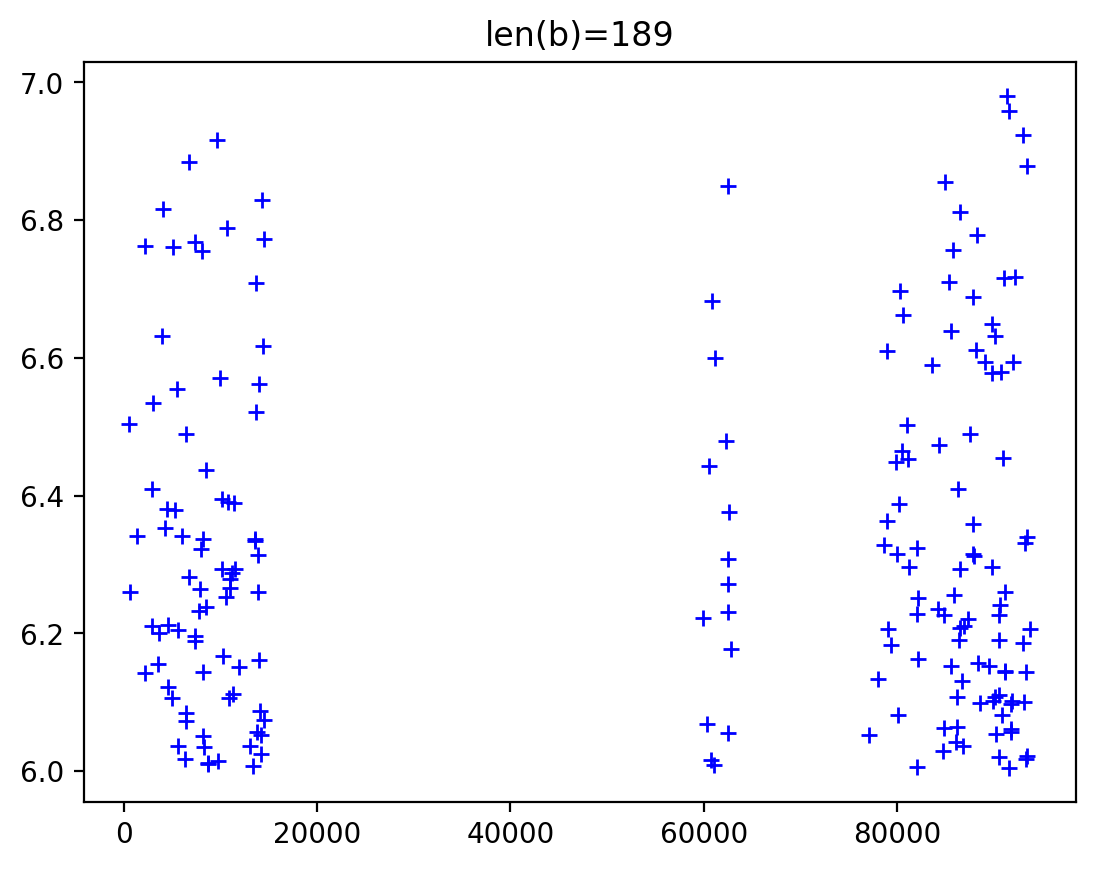

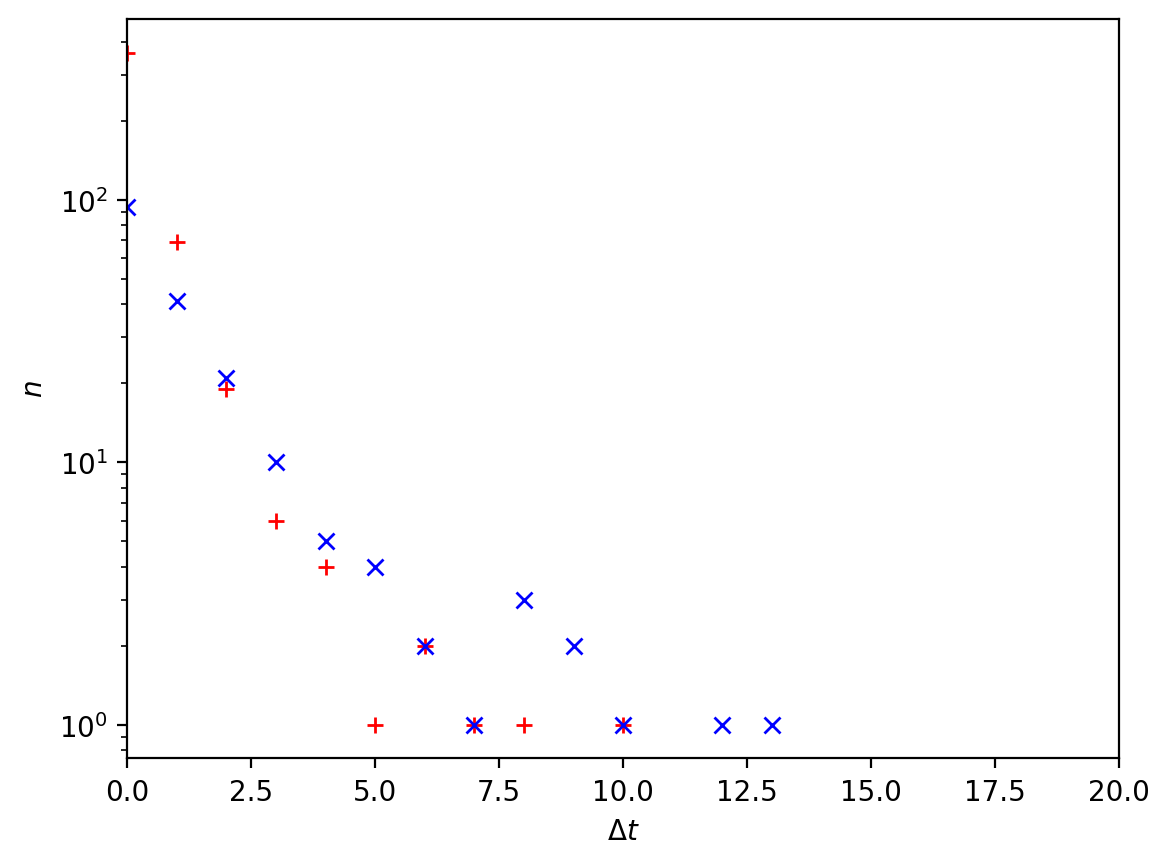

In [57]:
delta_t_bins = np.linspace(0, 10000, 100)
magnitude_bins = np.array([5.5, 6.0, 6.5, 7.0, 7.5, 8.0])

# bins = 10
lower_indices = np.where(time_series.event_magnitude >= 5.5)
upper_indices = np.where(time_series.event_magnitude < 6.0)
a = np.intersect1d(lower_indices, upper_indices)
counts_a, binEdges = np.histogram(np.diff(time_series.time[a]), bins=bins)
plt.figure()
plt.plot(time_series.time[a], time_series.event_magnitude[a], "b+")
plt.title(f"{len(a)=}")


lower_indices = np.where(time_series.event_magnitude >= 6.0)
upper_indices = np.where(time_series.event_magnitude < 7.0)
b = np.intersect1d(lower_indices, upper_indices)
counts_b, binEdges = np.histogram(np.diff(time_series.time[b]), bins=bins)
plt.figure()
plt.plot(time_series.time[b], time_series.event_magnitude[b], "b+")
plt.title(f"{len(b)=}")


# counts, binEdges = np.histogram(np.diff(time_series.time[a]), bins=300)
plt.figure()
plt.semilogy(counts_a, "r+")
plt.semilogy(counts_b, "bx")

plt.xlim([0, 20])
plt.xlabel("$\Delta t$")
plt.ylabel("$n$")
plt.show()

In [52]:
binEdges


array([    0.        ,   101.01010101,   202.02020202,   303.03030303,
         404.04040404,   505.05050505,   606.06060606,   707.07070707,
         808.08080808,   909.09090909,  1010.1010101 ,  1111.11111111,
        1212.12121212,  1313.13131313,  1414.14141414,  1515.15151515,
        1616.16161616,  1717.17171717,  1818.18181818,  1919.19191919,
        2020.2020202 ,  2121.21212121,  2222.22222222,  2323.23232323,
        2424.24242424,  2525.25252525,  2626.26262626,  2727.27272727,
        2828.28282828,  2929.29292929,  3030.3030303 ,  3131.31313131,
        3232.32323232,  3333.33333333,  3434.34343434,  3535.35353535,
        3636.36363636,  3737.37373737,  3838.38383838,  3939.39393939,
        4040.4040404 ,  4141.41414141,  4242.42424242,  4343.43434343,
        4444.44444444,  4545.45454545,  4646.46464646,  4747.47474747,
        4848.48484848,  4949.49494949,  5050.50505051,  5151.51515152,
        5252.52525253,  5353.53535354,  5454.54545455,  5555.55555556,
      

In [54]:
np.sum(counts_a)

467